#**Data Collection**

In [ ]:
%matplotlib inline

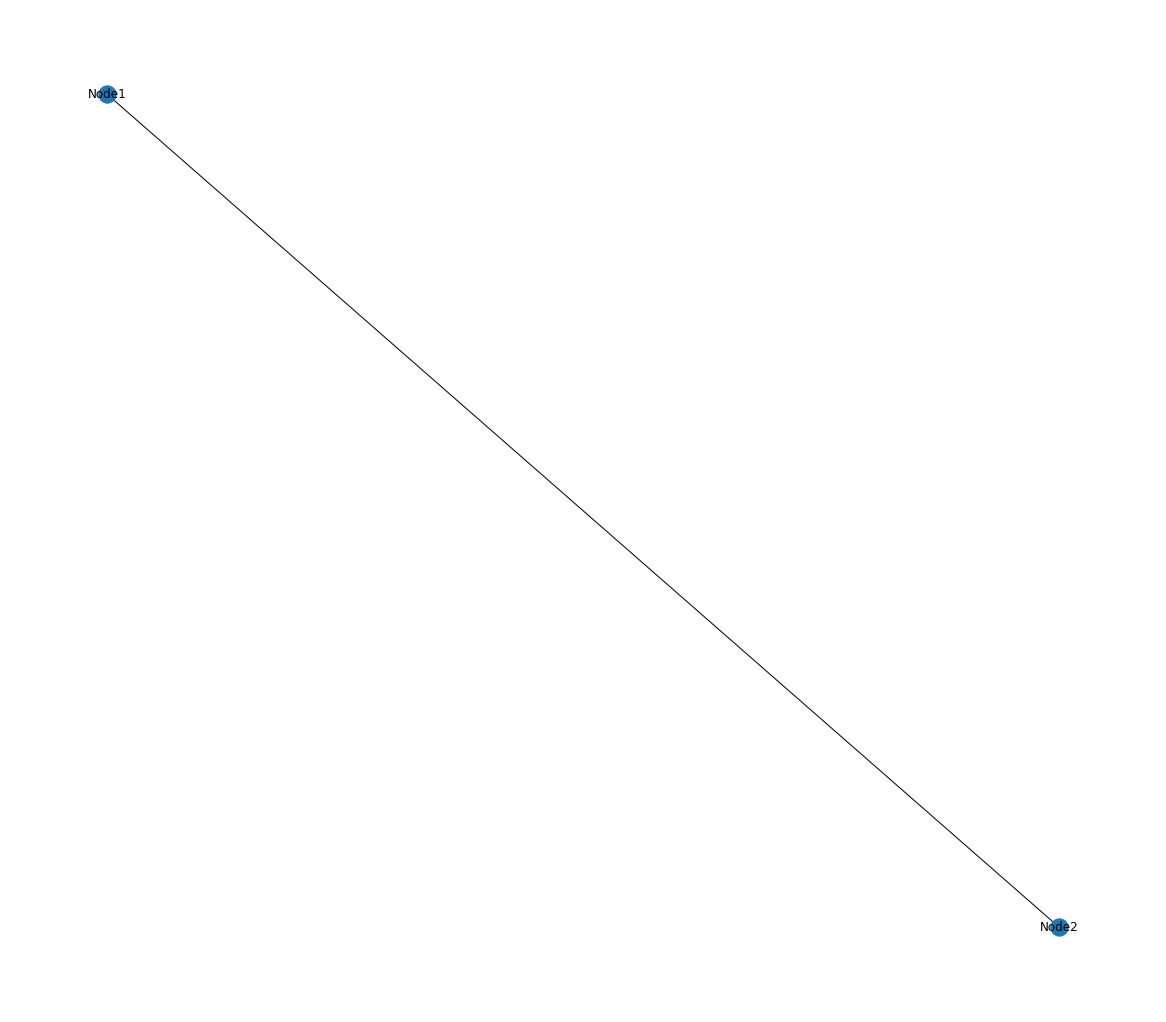

In [ ]:
import networkx as nx
import pylab as plt

G=nx.Graph()
# Add nodes and edges
G.add_edge("Node1", "Node2")
nx.draw(G, with_labels = True)

In [ ]:
import pandas as pd
df_char=pd.read_csv("/content/drive/MyDrive/SEM-6/Graph Analytics and Algorithms/case study/data/characters_affiliation_final.csv")
df_char.head()

,id,name,bio,affiliation
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...,Order of the Phoenix allies
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Order of the Phoenix
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,Dumbledore's Army
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...,Dumbledore's Army
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...,Death Eater


In [ ]:
df_rel=pd.read_csv("/content/drive/MyDrive/SEM-6/Graph Analytics and Algorithms/case study/data/relations_final.csv")
df_rel.head()

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [ ]:
G=nx.Graph()
for i in range(len(df_rel)):
  s=df_rel.loc[i,"source"]
  t=df_rel.loc[i,"target"]
  sn=df_char.loc[s,"name"]
  tn=df_char.loc[t,"name"]
  G.add_edge(sn,tn)

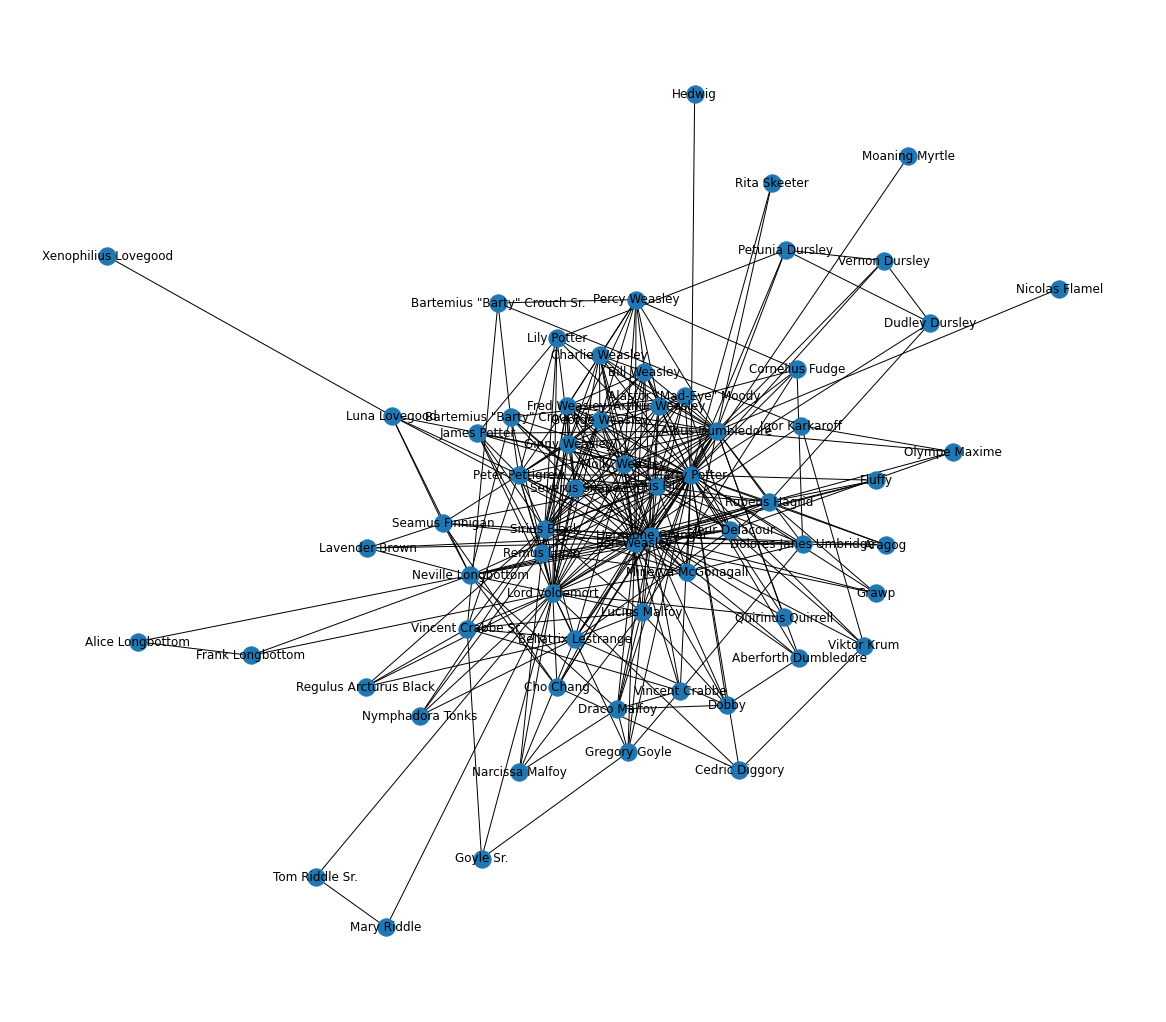

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
df_rel.loc[3,"source"]

1

#**Assign Character sides - Good, Evil and Neutral**

In [ ]:
# Sides dictionary for each of the affiliations
sides = {'Death Eater': 'evil',
         "Dumbledore's Army": 'good',
         "Dumbledore's Army allies": 'good',
         "Order of the Phoenix": 'good',
         "Order of the Phoenix allies": 'good',
         "Other": 'neutral'}

# Populate dataframe with sides based on the above dictionary
df_char['side'] = df_char['affiliation'].map(sides)

# Populate missing values with Other as affiliation and neutral as side
df_char['affiliation'] = df_char['affiliation'].fillna("Other")
df_char['side'] = df_char['side'].fillna("neutral")



In [ ]:
df_char.head(20)

,id,name,bio,affiliation,side,aff_color,side_color,src_side_color
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...,Order of the Phoenix allies,good,#b3e6cc,#40bf80,#40bf80
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Order of the Phoenix,good,#40bf80,#40bf80,#40bf80
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,Dumbledore's Army,good,#3366ff,#40bf80,#40bf80
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...,Dumbledore's Army,good,#3366ff,#40bf80,#40bf80
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...,Death Eater,evil,#ff4d4d,#ff4d4d,#40bf80
5,5,Vincent Crabbe,Slytherin student who was best friends with Go...,Death Eater,evil,#ff4d4d,#ff4d4d,#40bf80
6,6,"Bartemius ""Barty"" Crouch Sr.",Head of the department of Internation Magical ...,Other,neutral,#b3b3b3,#b3b3b3,#40bf80
7,7,"Bartemius ""Barty"" Crouch Jr.",Death Eater who impersonated Alastor Moody.,Death Eater,evil,#ff4d4d,#ff4d4d,#40bf80
8,8,Fleur Delacour,Participated in the Triwizard tournament and m...,Order of the Phoenix,good,#40bf80,#40bf80,#40bf80
9,9,Cedric Diggory,Participated in the Triwizard tournament and g...,Other,neutral,#b3b3b3,#b3b3b3,#40bf80


In [ ]:
g = nx.from_pandas_edgelist(df_rel, source='source', target='target')

# Add a graph name
g.graph['name_new'] = 'HP Characters'

In [ ]:
aff_dict = dict(zip(df_char.name, df_char.affiliation))
side_dict = dict(zip(df_char.name, df_char.side))

# Add attributes
nx.set_node_attributes(g, aff_dict, 'affiliation')
nx.set_node_attributes(g, side_dict, 'side')

In [ ]:
degree_centrality = nx.degree_centrality(g)

# Compute the eigenvector centrality for the graph g. 
eigenvector_centrality = nx.eigenvector_centrality(g)

betweenness_centrality = nx.betweenness_centrality(g)

closeness_centrality = nx.closeness_centrality(g)


current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(g)

# Set the  centralities as the node attributes for each node
nx.set_node_attributes(g, degree_centrality, 'degree_centrality')
nx.set_node_attributes(g, eigenvector_centrality, 'eigenvector_centrality')

# Create a df with the measurements
metrics = pd.DataFrame({'eigenvector_centrality': eigenvector_centrality,
                        'degree_centrality': degree_centrality,
                        'betweenness_centrality': betweenness_centrality,
                        'closeness_centrality' : closeness_centrality,                        
                        'current_flow_betweenness_centrality' : current_flow_betweenness_centrality,
                        'affiliation': dict(df_char['affiliation']),
                        'side': dict(df_char['side'])})

round(metrics,2)

,eigenvector_centrality,degree_centrality,betweenness_centrality,closeness_centrality,current_flow_betweenness_centrality,affiliation,side
0,0.04,0.06,0.00,0.44,0.01,Order of the Phoenix allies,good
1,0.22,0.36,0.03,0.59,0.08,Order of the Phoenix,good
25,0.12,0.20,0.02,0.55,0.06,Death Eater,evil
45,0.26,0.56,0.20,0.69,0.23,Death Eater,evil
11,0.26,0.50,0.10,0.65,0.17,Order of the Phoenix,good
...,...,...,...,...,...,...,...
30,0.00,0.02,0.00,0.33,0.00,Other,neutral
43,0.02,0.03,0.00,0.41,0.01,Other,neutral
44,0.02,0.03,0.00,0.41,0.01,Other,neutral
61,0.02,0.02,0.00,0.45,0.00,Dumbledore's Army allies,good


In [ ]:
metrics["current_flow_betweenness_centrality"].min()


0.0

In [ ]:
metrics["current_flow_betweenness_centrality"]

0     1.324071e-02
1     8.257376e-02
25    5.826901e-02
45    2.266070e-01
11    1.655100e-01
          ...     
30    7.049035e-18
43    1.041667e-02
44    1.041667e-02
61    0.000000e+00
62    0.000000e+00
Name: current_flow_betweenness_centrality, Length: 65, dtype: float64

In [ ]:
rslt_df = metrics.sort_values(by = 'current_flow_betweenness_centrality', ascending = False)
rslt_df.tail()

,eigenvector_centrality,degree_centrality,betweenness_centrality,closeness_centrality,current_flow_betweenness_centrality,affiliation,side
46,0.033701,0.031250,0.0,0.460432,3.618588e-03,Other,neutral
17,0.015078,0.015625,0.0,0.397516,8.546955e-17,Other,neutral
30,0.003648,0.015625,0.0,0.326531,7.049035e-18,Other,neutral
61,0.018623,0.015625,0.0,0.447552,0.000000e+00,Dumbledore's Army allies,good
62,0.018623,0.015625,0.0,0.447552,0.000000e+00,Other,neutral


In [ ]:
df_char.iloc[[46,17,30,61,62]]

,id,name,bio,affiliation,side,aff_color,side_color
46,46,Rita Skeeter,Reporter at the Daily Prophet.,Other,neutral,#b3b3b3,#b3b3b3
17,17,Nicolas Flamel,Creator of the Philosopher's Stone.,Other,neutral,#b3b3b3,#b3b3b3
30,30,Xenophilius Lovegood,Father of Luna and editor of The Quibbler.,Other,neutral,#b3b3b3,#b3b3b3
61,61,Hedwig,Harry's owl.,Dumbledore's Army allies,good,#99b3ff,#40bf80
62,62,Moaning Myrtle,Ghost at Hogwards.,Other,neutral,#b3b3b3,#b3b3b3


In [ ]:
rslt_df.iloc[[30,26,17,6,44]]

,eigenvector_centrality,degree_centrality,betweenness_centrality,closeness_centrality,current_flow_betweenness_centrality,affiliation,side
32,0.079689,0.140625,0.004909,0.500000,0.039586,Death Eater,evil
40,0.092521,0.125000,0.000436,0.516129,0.023666,Order of the Phoenix,good
36,0.128862,0.171875,0.002458,0.537815,0.034564,Order of the Phoenix,good
55,0.200316,0.281250,0.006459,0.571429,0.050764,Dumbledore's Army,good
14,0.037965,0.062500,0.000283,0.467153,0.016743,Other,neutral


In [ ]:
eigenvector_centrality

{0: 0.03764277144504018,
 1: 0.2180834894454993,
 2: 0.0440292560251432,
 3: 0.08002553905585637,
 4: 0.05530404870609702,
 5: 0.06927656998250875,
 6: 0.016016825647207668,
 7: 0.09049869303707905,
 8: 0.1082912523573113,
 9: 0.04085640881119588,
 10: 0.07109448398206707,
 11: 0.25982169724826903,
 12: 0.03068321054495512,
 13: 0.04278934287251883,
 14: 0.037964859395604844,
 15: 0.1466756333330337,
 16: 0.0804554086864874,
 17: 0.01507793540642665,
 18: 0.06133530520287273,
 19: 0.022663073550184116,
 20: 0.07670754903281733,
 21: 0.2778723410276421,
 22: 0.1270626073185475,
 23: 0.020254485840408096,
 24: 0.04457952228394444,
 25: 0.11675366975453465,
 26: 0.007495885484032586,
 27: 0.021675163831127994,
 28: 0.107491298446593,
 29: 0.06286413527708276,
 30: 0.003648157537925648,
 31: 0.1378194843710231,
 32: 0.07968893315489035,
 33: 0.10905493906997407,
 34: 0.04538658034507599,
 35: 0.029911454032657644,
 36: 0.1288622482314078,
 37: 0.12672080514197903,
 38: 0.16453199459808948,

In [ ]:
c=nx.clustering(g)
metrics = pd.DataFrame({'clusteing coefficient': c,
                        })
round(metrics.head(10),2)

,clusteing coefficient
0,0.83
1,0.48
2,1.00
3,0.76
4,0.22
5,0.62
6,0.00
7,0.50
8,0.49
9,0.67


#**Graph Visualization**

In [ ]:
# Define color palletes
aff_color_dict = {"Dumbledore's Army": "#3366ff",
                  "Dumbledore's Army allies": "#99b3ff",
                  "Order of the Phoenix": "#40bf80",
                  "Order of the Phoenix allies": "#b3e6cc",
                  "Other": "#b3b3b3",
                  "Death Eater": "#ff4d4d"}

side_color_dict = {'good': '#40bf80',
                   'evil': '#ff4d4d',
                   'neutral': '#b3b3b3'}

# Add coloring to the dataframe 
df_char['aff_color'] = df_char['affiliation'].map(aff_color_dict)
df_char['side_color'] = df_char['side'].map(side_color_dict)

df_char.head()

,id,name,bio,affiliation,side,aff_color,side_color
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...,Order of the Phoenix allies,good,#b3e6cc,#40bf80
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Order of the Phoenix,good,#40bf80,#40bf80
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,Dumbledore's Army,good,#3366ff,#40bf80
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...,Dumbledore's Army,good,#3366ff,#40bf80
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...,Death Eater,evil,#ff4d4d,#ff4d4d


In [ ]:
df_char.loc[50:60]

,id,name,bio,affiliation,side,aff_color,side_color
50,50,Arthur Weasley,Father of the Weasleys and member of the Order...,Order of the Phoenix,good,#40bf80,#40bf80
51,51,Bill Weasley,Oldest son of Arthur and Molly. Husband of Fleur.,Order of the Phoenix,good,#40bf80,#40bf80
52,52,Charlie Weasley,Second son of Arthur and Molly. Works with dra...,Order of the Phoenix,good,#40bf80,#40bf80
53,53,Fred Weasley,Identical twin with George and co-owner of Wea...,Dumbledore's Army,good,#3366ff,#40bf80
54,54,George Weasley,Identical twin with Fred and co-owner of Weasl...,Dumbledore's Army,good,#3366ff,#40bf80
55,55,Ginny Weasley,Marries Harry Potter and only daughter of Moll...,Dumbledore's Army,good,#3366ff,#40bf80
56,56,Molly Weasley,Wife of Arthur and mother of the Weasleys. Kil...,Order of the Phoenix,good,#40bf80,#40bf80
57,57,Percy Weasley,Third son of Arthur and Molly. He is a Gryffin...,Order of the Phoenix allies,good,#b3e6cc,#40bf80
58,58,Ron Weasley,Harry's best friend. Marries Hermione.,Dumbledore's Army,good,#3366ff,#40bf80
59,59,Dobby,House elf and friend of Harry. He is killed by...,Dumbledore's Army allies,good,#99b3ff,#40bf80


In [ ]:
g.graph['potter'] = 'HP Characters'

In [ ]:
aff_colors = dict(zip(df_char.name, df_char.aff_color))
side_colors = dict(zip(df_char.name, df_char.side_color))

# Set the coloring palletes to nodes
nx.set_node_attributes(g, aff_colors, 'aff_colors')
nx.set_node_attributes(g, side_colors, 'side_colors')

In [ ]:
node_size_degree = [float(g.nodes[name]['degree_centrality']) * 6000 for name in g]
node_size_eigen = [float(g.nodes[name]['eigenvector_centrality']) * 6000 for name in g]
'''node_color_side = [g.nodes[name]['side_colors'] for name in g.nodes()]
node_color_aff = [g.nodes[name]['aff_colors'] for name in g]'''

"node_color_side = [g.nodes[name]['side_colors'] for name in g.nodes()]\nnode_color_aff = [g.nodes[name]['aff_colors'] for name in g]"

In [ ]:
df_rel.head()

,source,target,type,src_aff,trg_aff,src_side,trg_side,src_aff_color
0,0,1,-,Order of the Phoenix allies,Order of the Phoenix,good,good,#b3e6cc
1,0,25,-,Order of the Phoenix allies,Death Eater,good,evil,#b3e6cc
2,0,45,-,Order of the Phoenix allies,Death Eater,good,evil,#b3e6cc
3,1,0,-,Order of the Phoenix,Order of the Phoenix allies,good,good,#40bf80
4,1,11,+,Order of the Phoenix,Order of the Phoenix,good,good,#40bf80


In [ ]:
plt.rcParams['figure.figsize'] = [16, 14]
degree_graph = nx.draw_kamada_kawai(g, 
                                    with_labels=True, 
                                    node_color=node_color_aff, 
                                    node_size=node_size_degree, 
                                    width=0.2)

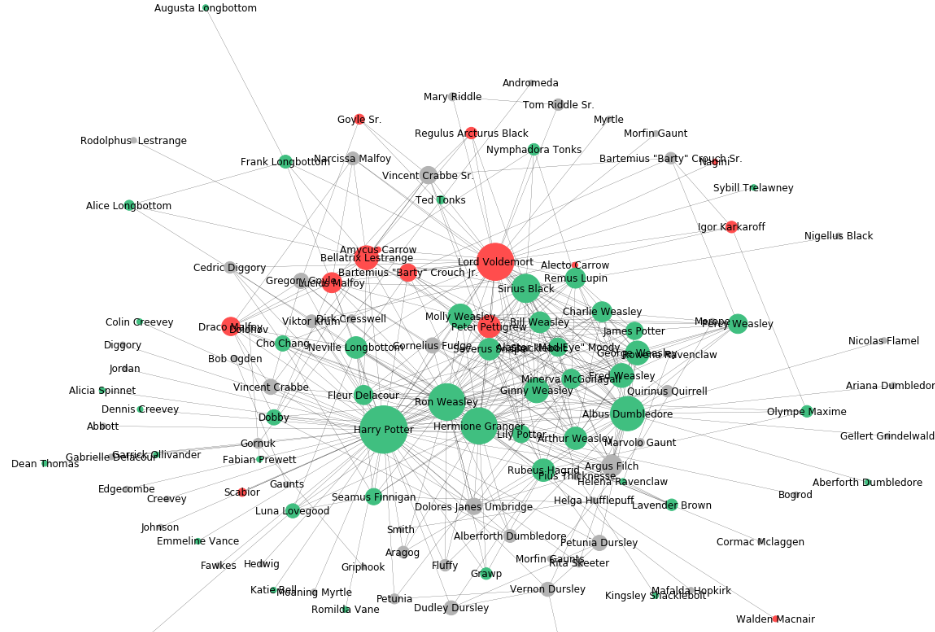

In [ ]:
plt.rcParams['figure.figsize'] = [16, 14]
degree_graph = nx.draw_kamada_kawai(g, 
                                    with_labels=True, 
                                    node_color=node_color_aff, 
                                    node_size=node_size_eigen, 
                                    width=0.2)

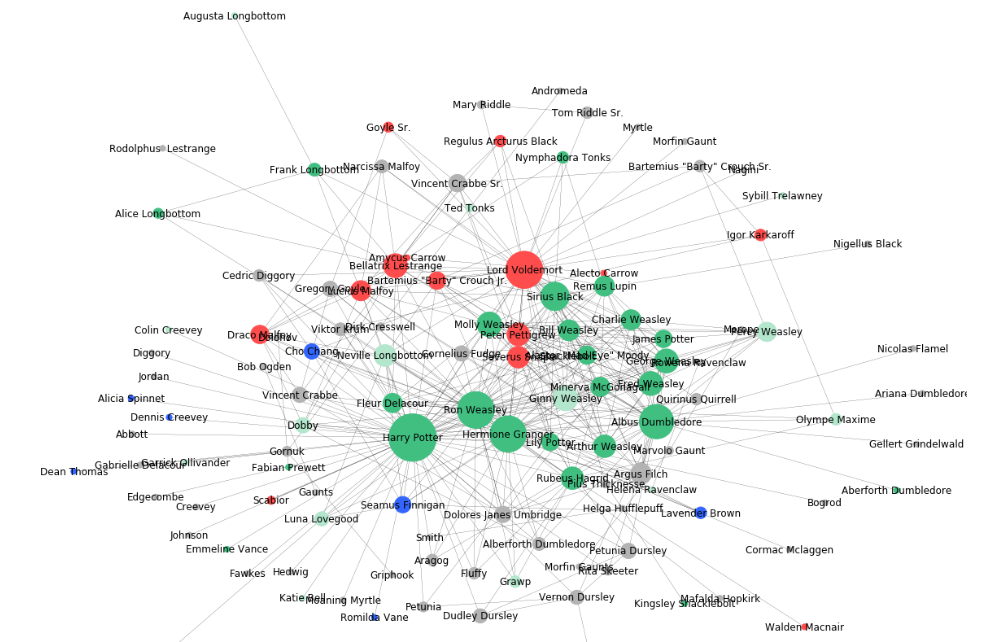

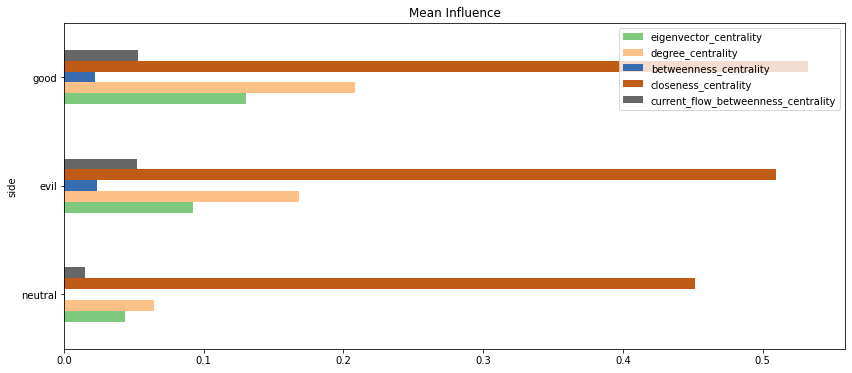

In [ ]:
plt.rcParams['figure.figsize'] = [14, 6]
metrics.groupby('side').mean().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', title='Mean Influence')



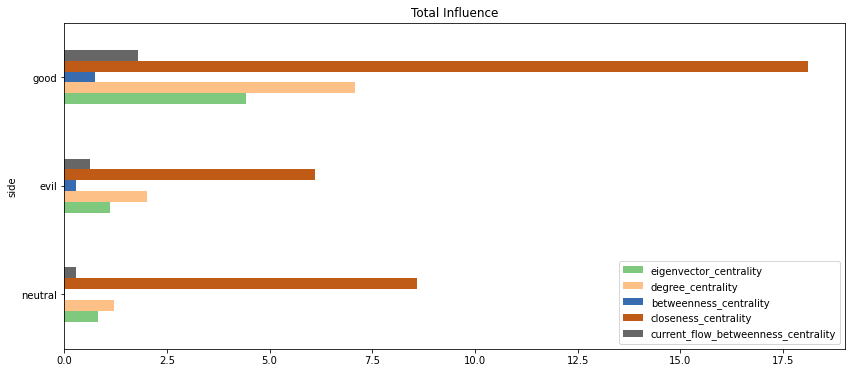

In [ ]:
plt.rcParams['figure.figsize'] = [14, 6]
metrics.groupby('side').sum().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', title='Total Influence')

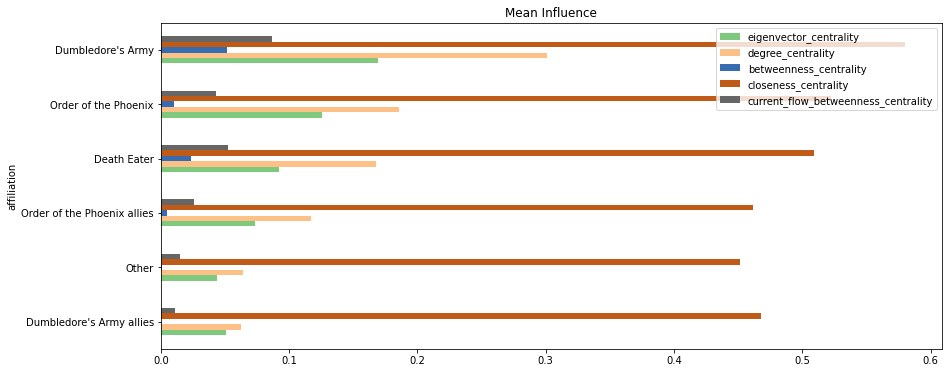

In [ ]:

plt.rcParams['figure.figsize'] = [14, 6]
metrics.groupby('affiliation').mean().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', title='Mean Influence')



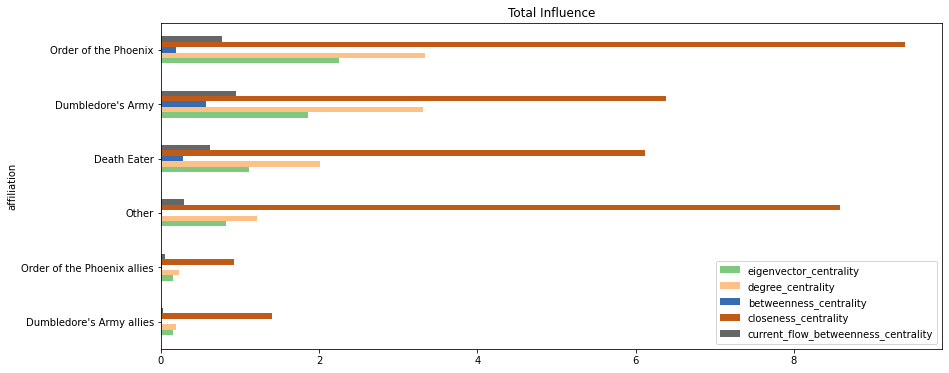

In [ ]:

plt.rcParams['figure.figsize'] = [14, 6]
metrics.groupby('affiliation').sum().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', title='Total Influence')

In [ ]:
node_size_degree = [float(g.nodes[name]['degree_centrality']) * 6000 for name in g]
node_size_eigen = [float(g.nodes[name]['eigenvector_centrality']) * 6000 for name in g]


KeyError: ignored

#**---------------------------------------------------------------
**

In [ ]:
aff = {}
for key in [4,5,7,19,20,25,32,33,34,38,45]:
    aff[key] = "Death Eater"
for key in [2,3,16,21,28,29,39,53,54,55,58]:
    aff[key] = "Dumbledore's Army"
for key in [59,61,64]:
    aff[key] = "Dumbledore's Army allies"
for key in [1,8,10,11,22,26,27,31,36,37,40,41,47,48,50,51,52,56]:
    aff[key] = "Order of the Phoenix"
for key in [0,57]:
    aff[key] = "Order of the Phoenix allies"    
for key in [6,9,12,13,14,15,17,18,24,30,35,42,43,44,46,49,60,62,63]:
    aff[key] = "Other"                

# Populate dataframe with sides based on the above dictionary
df_rel['src_aff'] = df_rel['source'].map(aff)
df_rel['trg_aff'] = df_rel['target'].map(aff)

In [ ]:
sides = {'Death Eater': 'evil',
         "Dumbledore's Army": 'good',
         "Dumbledore's Army allies": 'good',
         "Order of the Phoenix": 'good',
         "Order of the Phoenix allies": 'good',
         "Other": 'neutral'}

# Populate dataframe with sides based on the above dictionary
df_rel['src_side'] = df_rel['src_aff'].map(sides)
df_rel['trg_side'] = df_rel['trg_aff'].map(sides)


In [ ]:
import networkx as nx
import pylab as plt


In [ ]:
g = nx.from_pandas_edgelist(df_rel, source='source', target='target')

# Add a graph name
g.graph['name_new'] = 'HP Characters'

In [ ]:
aff_dict = dict(zip(df_char.name, df_char.affiliation))
side_dict = dict(zip(df_char.name, df_char.side))

# Add attributes
nx.set_node_attributes(g, aff_dict, 'affiliation')
nx.set_node_attributes(g, side_dict, 'side')

In [ ]:
node_size_degree = [float(g.nodes[name]['degree_centrality']) * 6000 for name in g]
node_size_eigen = [float(g.nodes[name]['eigenvector_centrality']) * 6000 for name in g]


In [ ]:
df_rel['src_aff_color'] = df_rel['src_aff'].map(aff_color_dict)
df_rel['src_side_color'] = df_rel['src_side'].map(side_color_dict)


In [ ]:
df_char.head()

,id,name,bio,affiliation,side,aff_color,side_color
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...,Order of the Phoenix allies,good,#b3e6cc,#40bf80
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Order of the Phoenix,good,#40bf80,#40bf80
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,Dumbledore's Army,good,#3366ff,#40bf80
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...,Dumbledore's Army,good,#3366ff,#40bf80
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...,Death Eater,evil,#ff4d4d,#ff4d4d


In [ ]:
node_size_degree = [float(g.nodes[name]['degree_centrality']) * 6000 for name in g]
node_size_eigen = [float(g.nodes[name]['eigenvector_centrality']) * 6000 for name in g]
node_color_side = [g.nodes[name]['side_colors'] for name in df_rel.loc["source"]]
node_color_aff = [g.nodes[name]['aff_colors'] for name in df_rel.loc["source"]]

In [ ]:
node_color_side = []
for i in range(len(df_char)):
  node_color_side.append(df_char.loc[i,"side_color"])

In [ ]:
df_rel.head()

,source,target,type,src_aff,trg_aff,src_side,trg_side,src_aff_color,src_side_color
0,0,1,-,Order of the Phoenix allies,Order of the Phoenix,good,good,#b3e6cc,#40bf80
1,0,25,-,Order of the Phoenix allies,Death Eater,good,evil,#b3e6cc,#40bf80
2,0,45,-,Order of the Phoenix allies,Death Eater,good,evil,#b3e6cc,#40bf80
3,1,0,-,Order of the Phoenix,Order of the Phoenix allies,good,good,#40bf80,#40bf80
4,1,11,+,Order of the Phoenix,Order of the Phoenix,good,good,#40bf80,#40bf80


In [ ]:
G_sam=nx.Graph()
for i in range(10):
  s=df_rel.loc[i,"source"]
  t=df_rel.loc[i,"target"]
  sn=df_char.loc[s,"name"]
  tn=df_char.loc[t,"name"]
  G.add_edge(sn,tn)
node_color_side = [g.nodes[name]['side_colors'] for name in g.nodes()]


In [ ]:
df_char['aff_color'] = df_char['affiliation'].map(aff_color_dict)
df_char['side_color'] = df_char['side'].map(side_color_dict)

In [ ]:
a=df_rel["src_aff_color"].to_list()
a

In [ ]:
G1=nx.Graph()
for i in range(len(df_rel)):
  s=df_rel.loc[i,"source"]
  t=df_rel.loc[i,"target"]
  sn=df_char.loc[s,"name"]
  tn=df_char.loc[t,"name"]
  G.add_edge(sn,tn)

In [ ]:
nx.set_node_attributes(g, aff_colors, 'aff_colors')
nx.set_node_attributes(g, side_colors, 'side_colors')

In [ ]:
import matplotlib.pyplot as plt
plt.show()

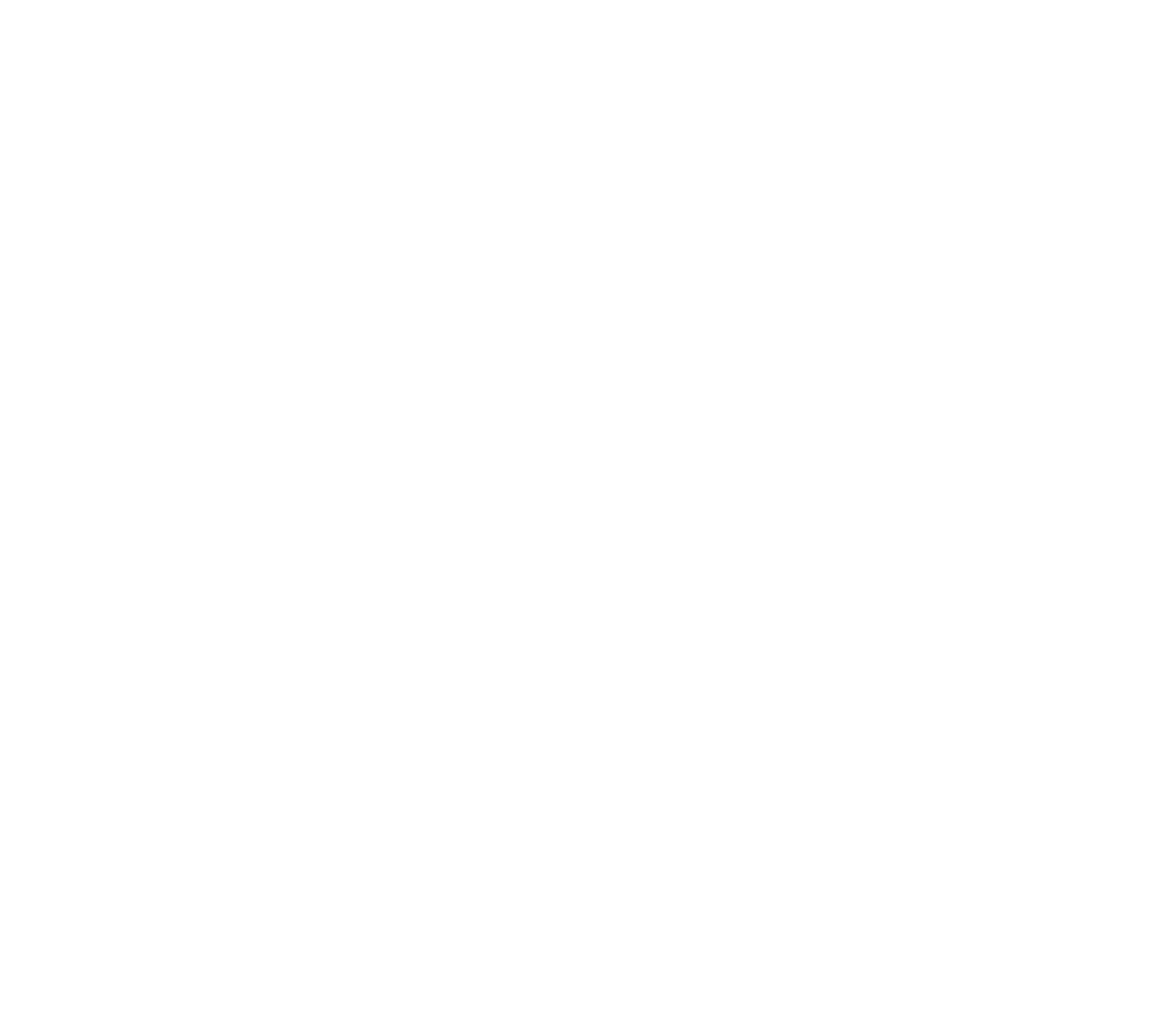

<Figure size 1152x1008 with 0 Axes>

In [ ]:

G1=nx.Graph()
'''for i in range(len(df_rel)):
  s=df_rel.loc[i,"source"]
  t=df_rel.loc[i,"target"]
  sn=df_char.loc[s,"name"]
  tn=df_char.loc[t,"name"]
  G.add_edge(sn,tn)'''
plt.rcParams['figure.figsize'] = [16, 14]
degree_graph = nx.draw(G1, 
                                    with_labels=True, 
                                    node_color=node_color_side, 
                                    node_size=node_size_degree, 
                                    width=0.2)
plt.show()
plt.savefig('books_read.png')

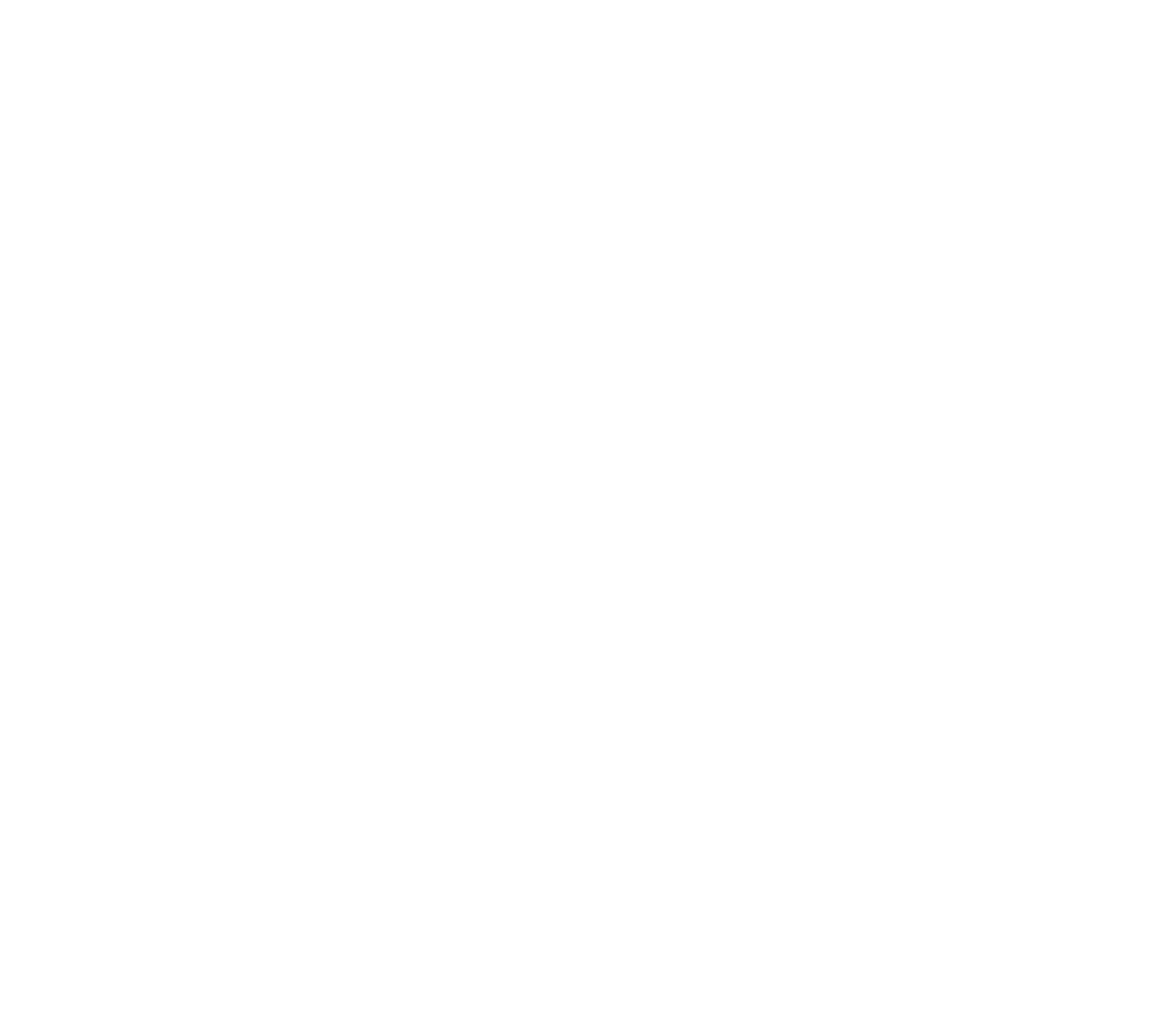

In [ ]:
nx.draw_kamada_kawai(G1, 
                                    with_labels=True, 
                                    node_color=node_color_side, 
                                    node_size=node_size_degree, 
                                    width=0.2)

In [ ]:
node_color_aff

['#b3e6cc',
 '#b3e6cc',
 '#b3e6cc',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#3366ff',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#b3b3b3',
 '#b3b3b3',
 '#b3b3b3',
 '#b3b3b3',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#ff4d4d',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#b3b3b3',
 '#b3b3b3',
 '#b3b3b3',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#40bf80',
 '#4

In [ ]:
node_color_side = [g.nodes[name]['side_colors'] for name in g.nodes()]
node_color_aff = [g.nodes[name]['aff_colors'] for name in g]

In [ ]:
node_color_side = []
for i in range(len(df_char)):
  node_color_side.append(g.nodes[i]['side_colors']) 

KeyError: ignored

In [ ]:
G=nx.Graph()
for i in range(len(df_rel)):
  s=df_rel.loc[i,"source"]
  t=df_rel.loc[i,"target"]
  sn=df_char.loc[s,"name"]
  tn=df_char.loc[t,"name"]
  G.add_edge(sn,tn)

In [ ]:
node_size_bet = [float(g.nodes[name]['betweenness_centrality']) * 6000 for name in g]
node_size_close = [float(g.nodes[name]['closeness_centrality']) * 6000 for name in g]
node_size_cfbc = [float(g.nodes[name]['current_flow_betweenness_centrality']) * 6000 for name in g]


KeyError: ignored

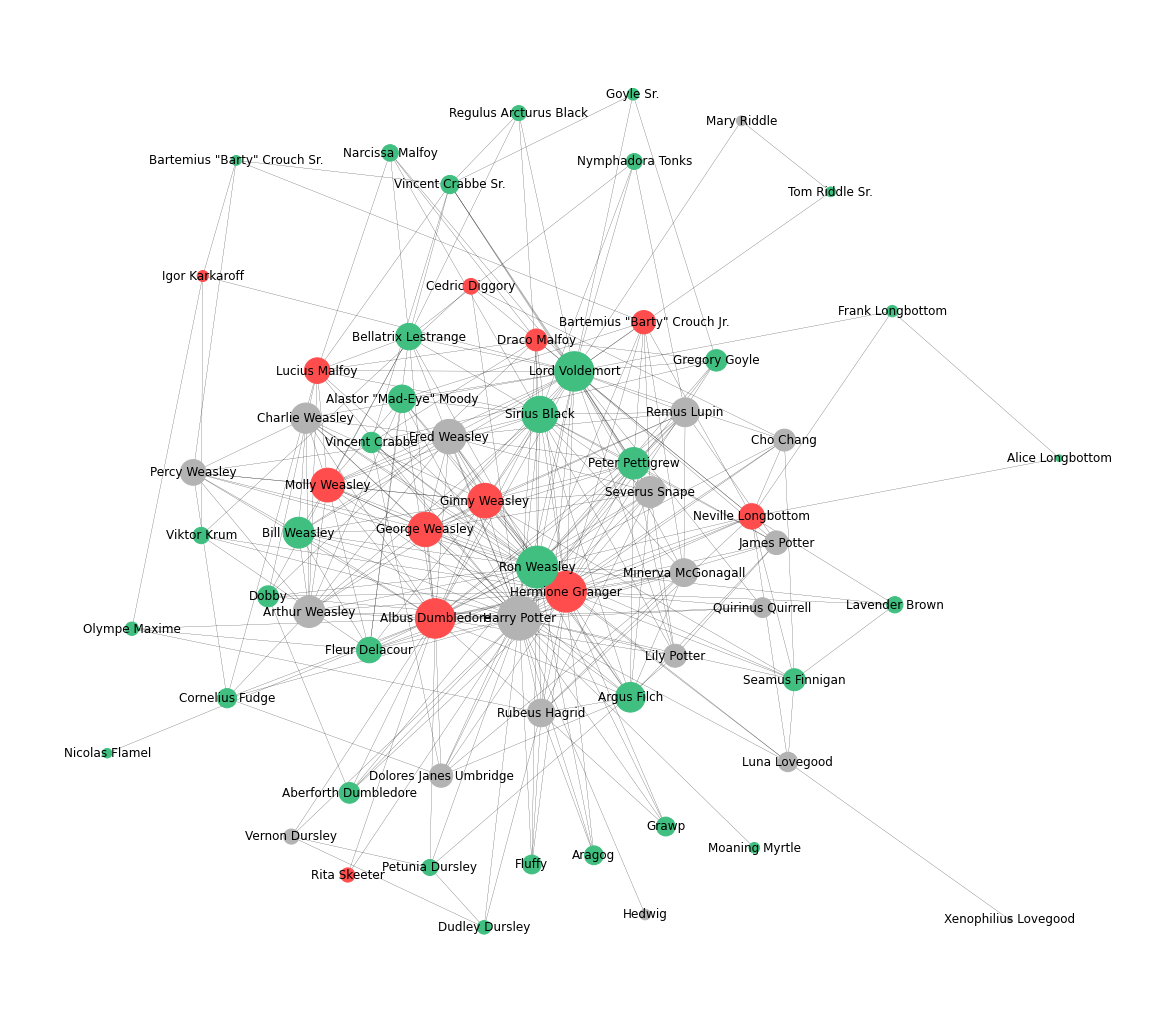

In [ ]:
degree_graph = nx.draw_kamada_kawai(G, 
                                    with_labels=True, 
                                    node_color=node_color_side, 
                                    node_size=node_size_eigen, 
                                    width=0.2)

In [ ]:
G1=nx.Graph()
for i in range(len(df_rel)):
  s=df_rel.loc[i,"source"]
  t=df_rel.loc[i,"target"]
  sn=df_char.loc[s,"name"]
  tn=df_char.loc[t,"name"]
  G.add_edge(sn,tn)

In [ ]:
eigen_centrality = nx.eigenvector_centrality(G)
all_nodes = [(node,eigen_centrality(node)) for node in eigen_centrality]

top_100_centrality = nx.eigenvector_centrality(G)
nx.draw_spring(G, k =1, node_color = node_colours, \
               node_size = [top_100_centrality(n) for n in G1.nodes()], 
               font_size = 6, with_labels = True) 

TypeError: ignored